# Breast Cancer Dataset

In this notebook, we will be aiming to classify tumors as malignant or cancerous.

Data Source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

# Preparing the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

The dataset is inputted into a dataframe.

In [3]:
cols = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2','texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry', 'fractal_dimension']
df = pd.read_csv('wdbc.data', names = cols)
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The categorical data that we are trying to predict, the diagnosis, is casted as integers, with the following legends:

*   B (benign): 0
*   M (malignant): 1

We also dropped the column ID, as they are not relevant to the analysis.

The continuous data are marked with 1, 2, or 3, indicating their data type:
*   1: mean
*   2: standard error
*   3: worst (mean of the three largest values of the features computed for the images)


In [4]:
df["Diagnosis"] = (df["Diagnosis"] == "M").astype(int)
df = df.drop("ID", axis = 1)
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry,fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We then plotted all of the characteristics separated into benign and malignant tumors and saw what are some possible relationships that we can see.

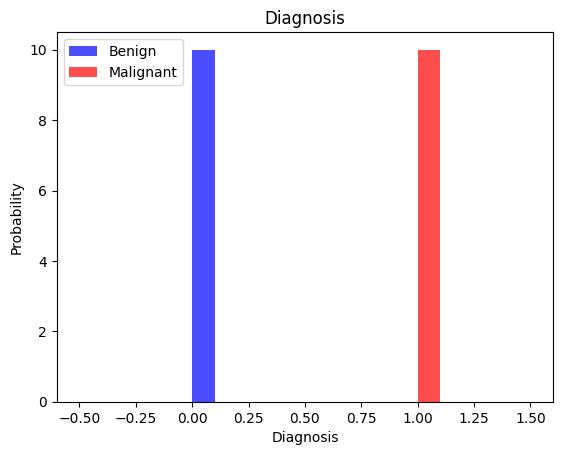

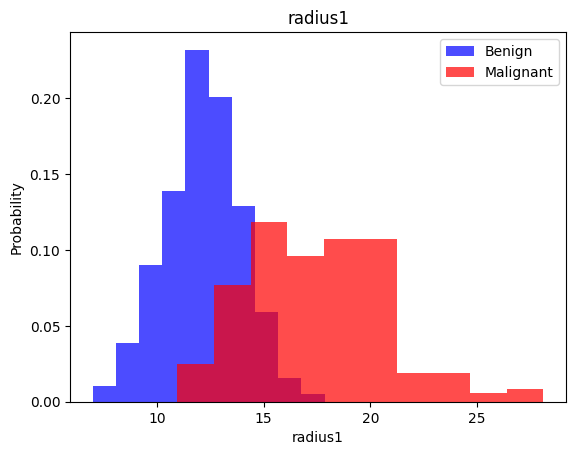

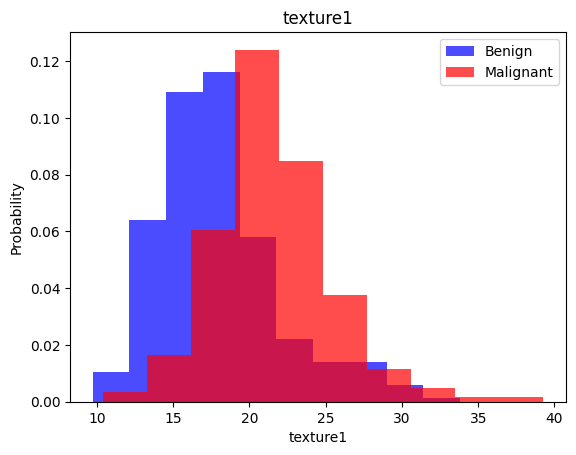

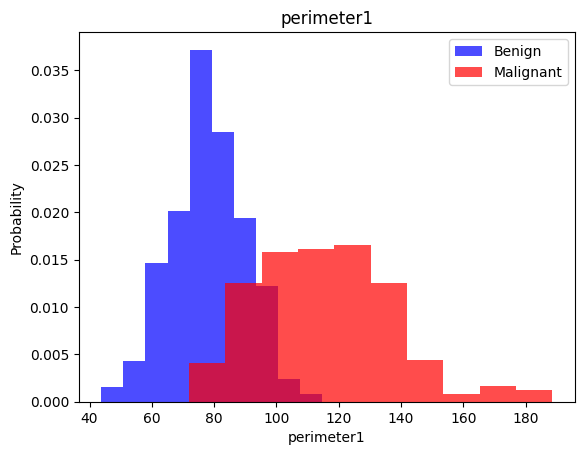

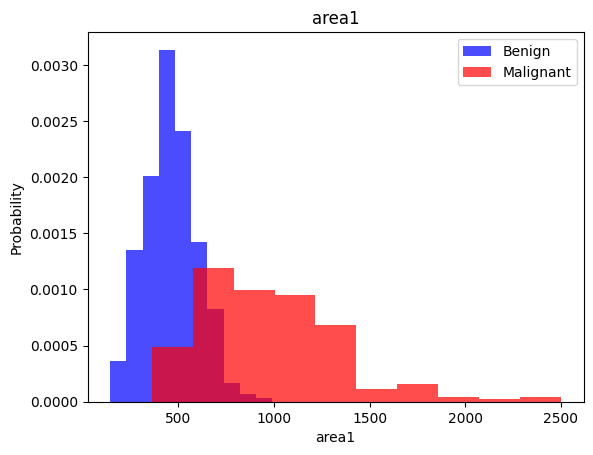

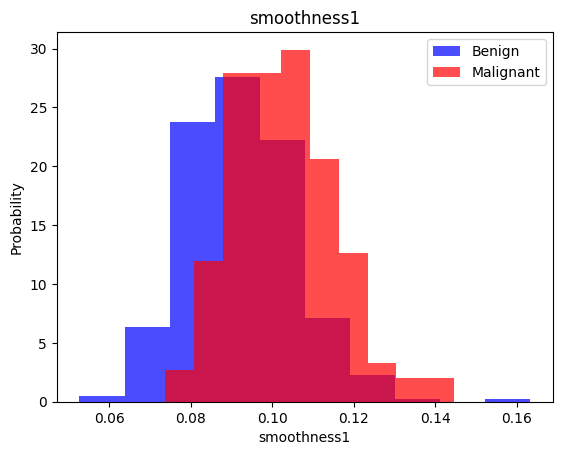

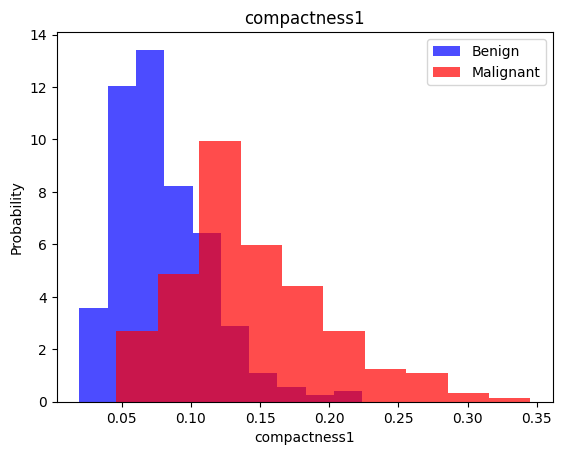

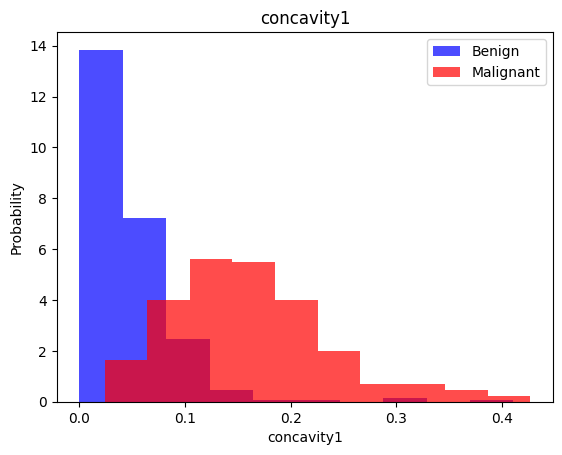

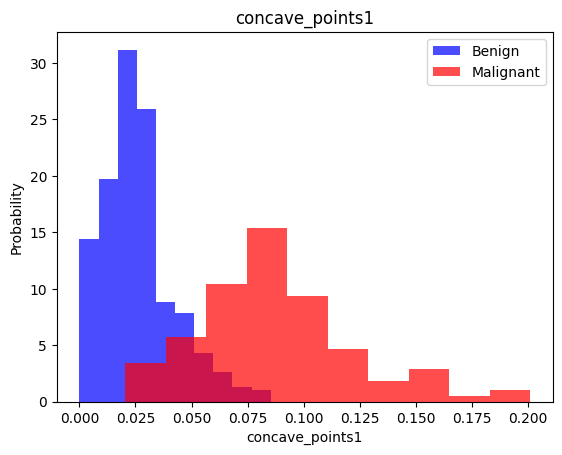

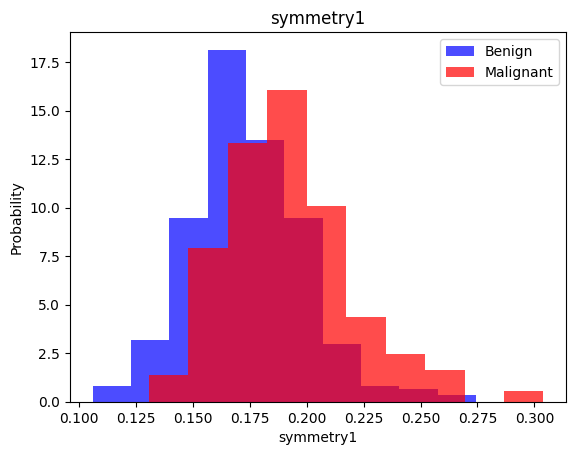

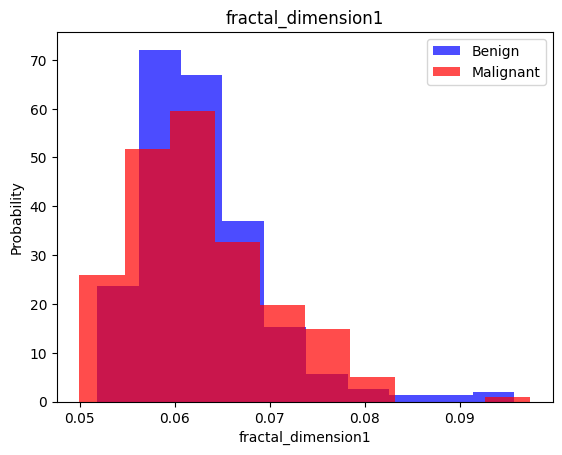

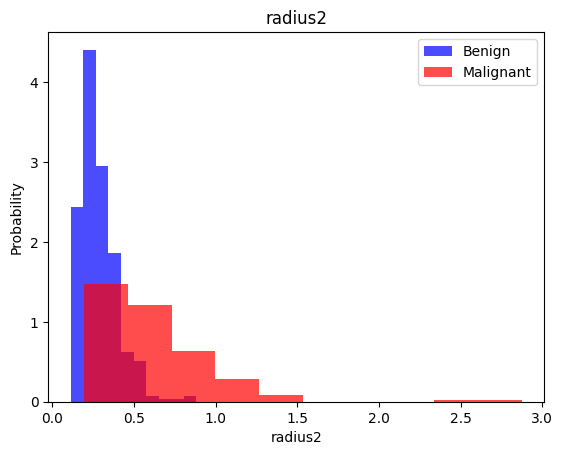

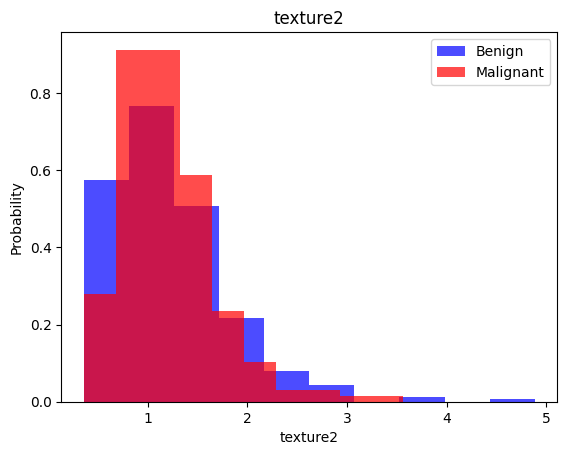

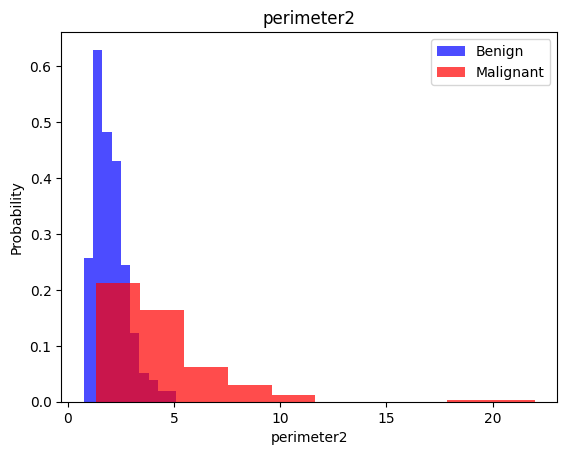

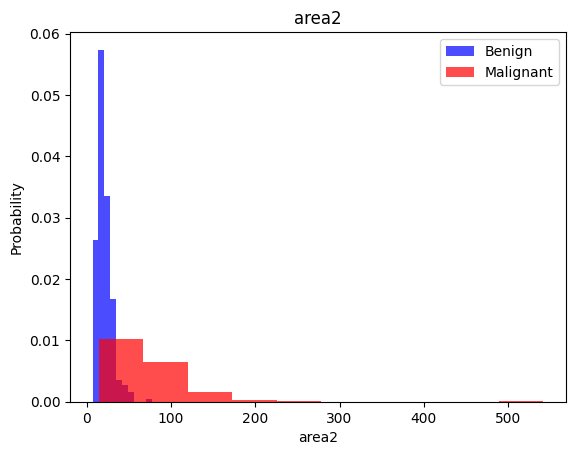

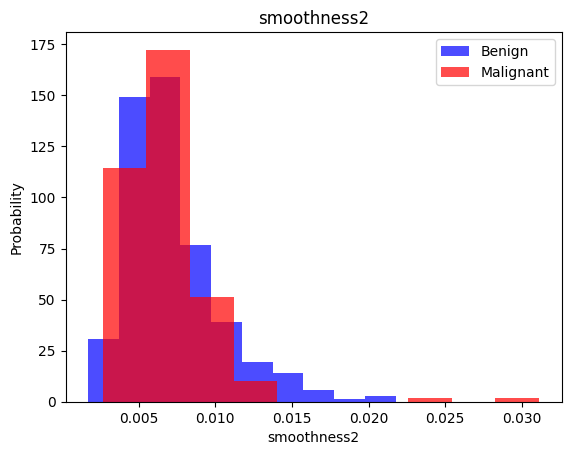

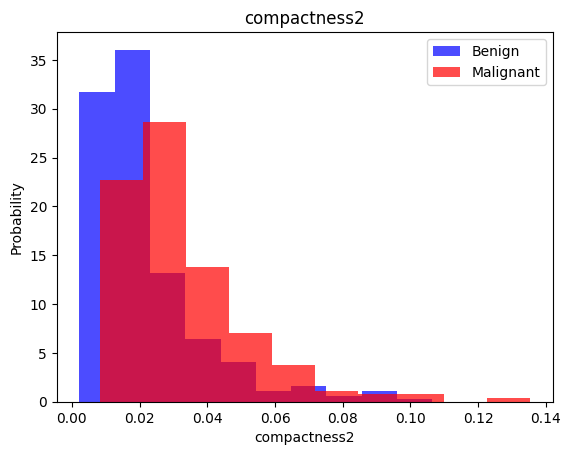

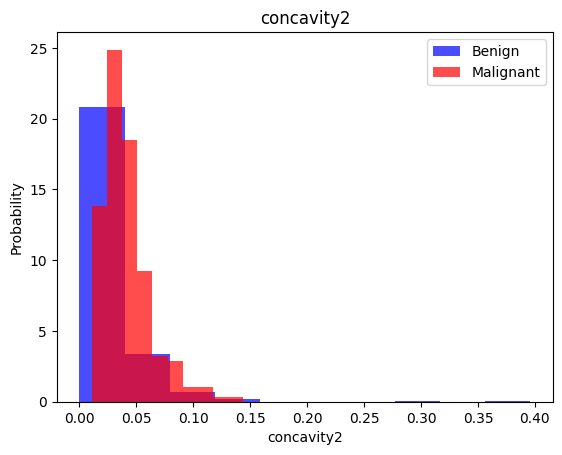

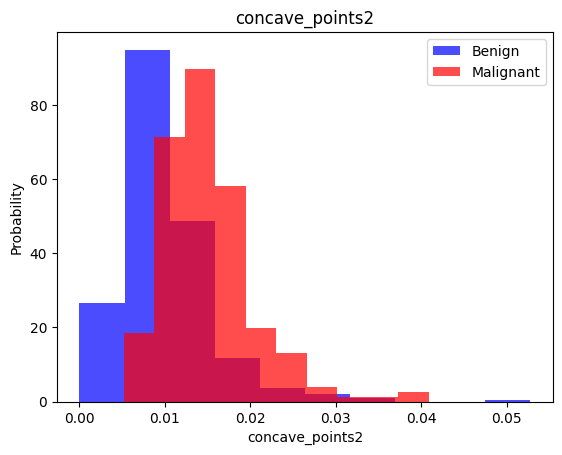

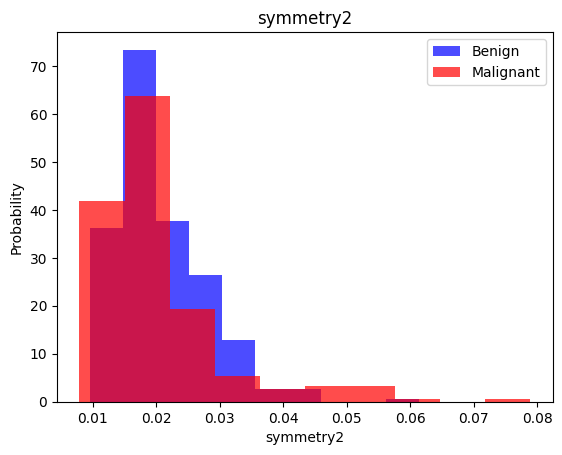

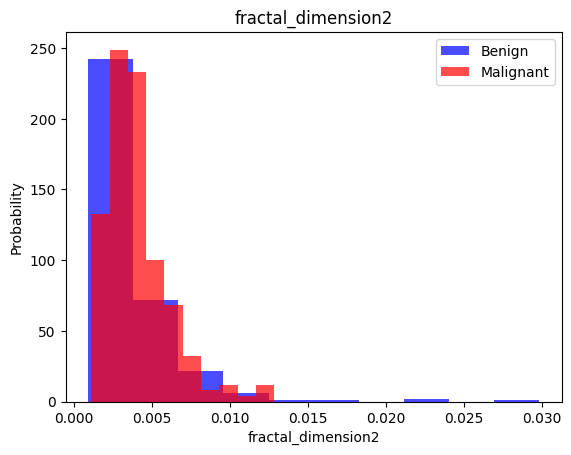

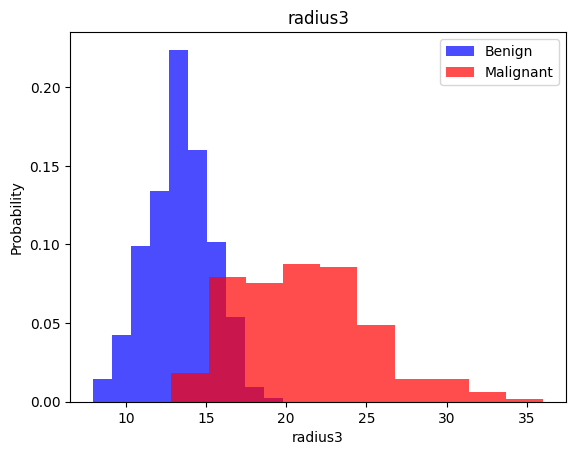

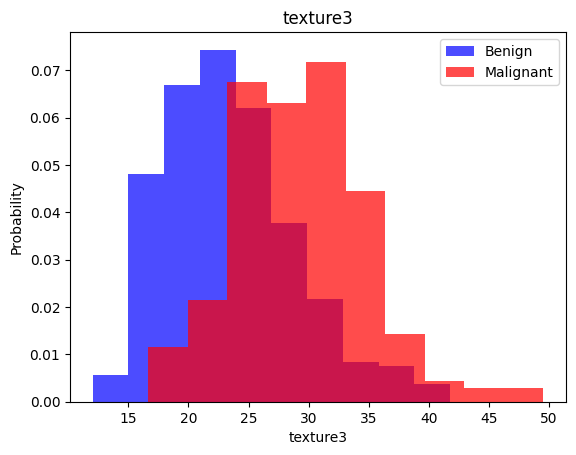

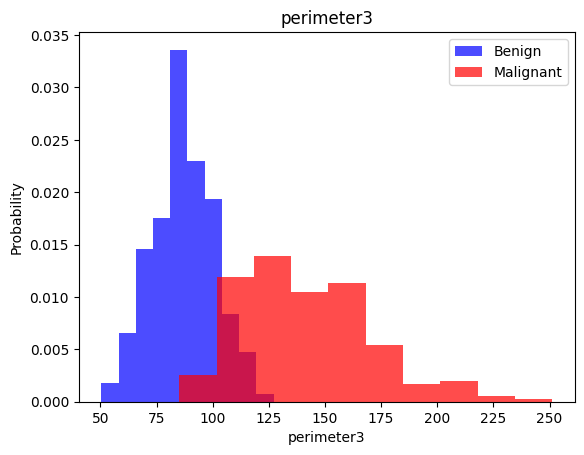

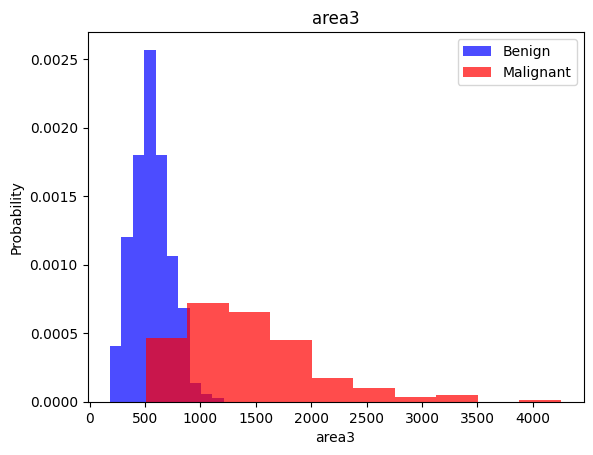

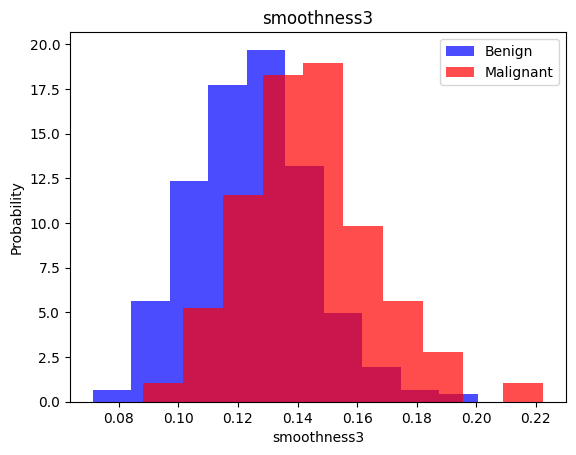

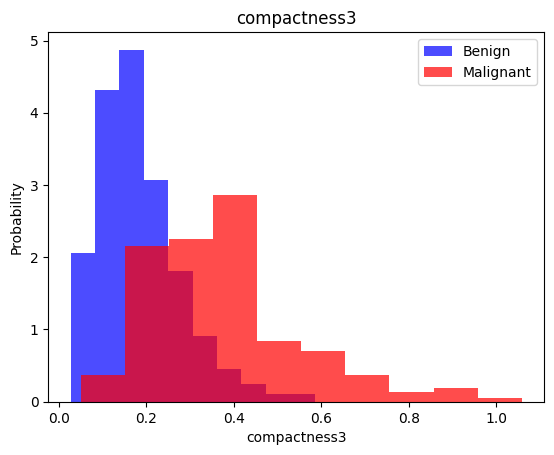

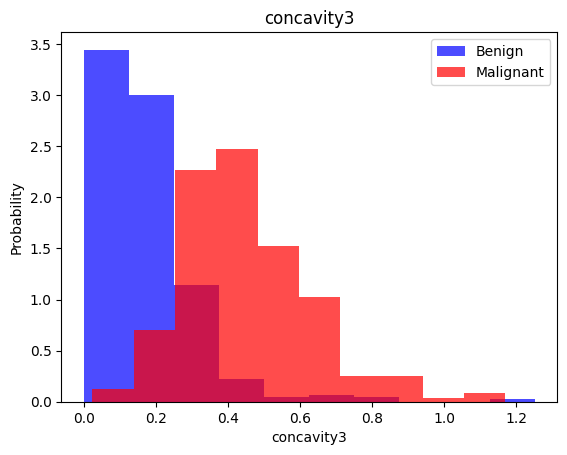

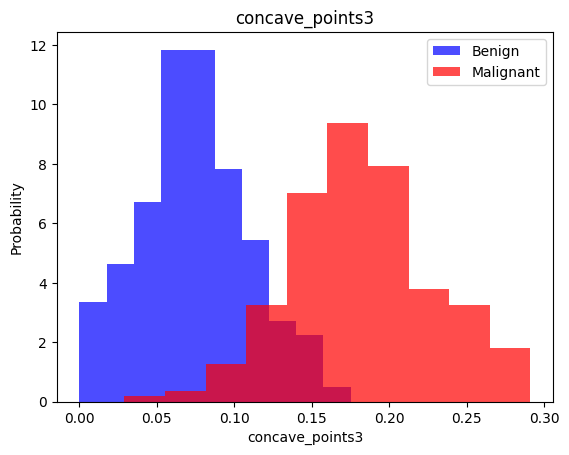

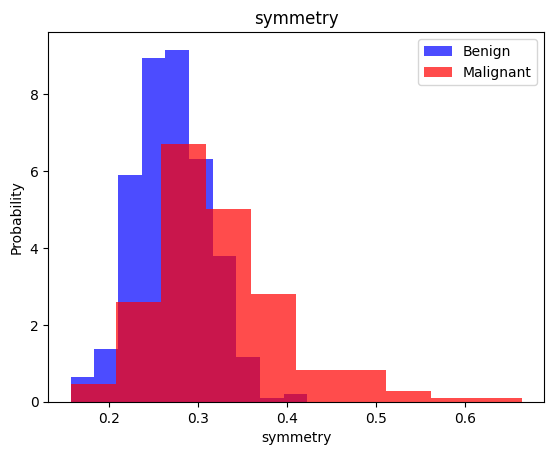

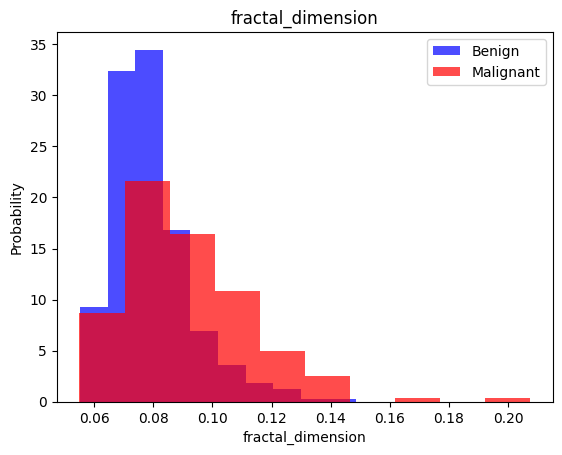

In [5]:
for label in list(df.columns.values):
  plt.hist(df[df["Diagnosis"] == 0][label], color = "blue", label = "Benign", alpha = 0.7, density = True)
  plt.hist(df[df["Diagnosis"] == 1][label], color = "red", label = "Malignant", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

As we can see, they are all important in determining whether or not a tumor cell is benign or malignant as their probability distributions are in some way, different from each other.

In [6]:
df.describe()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


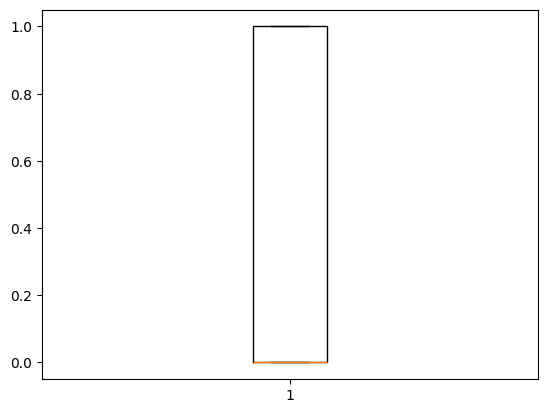

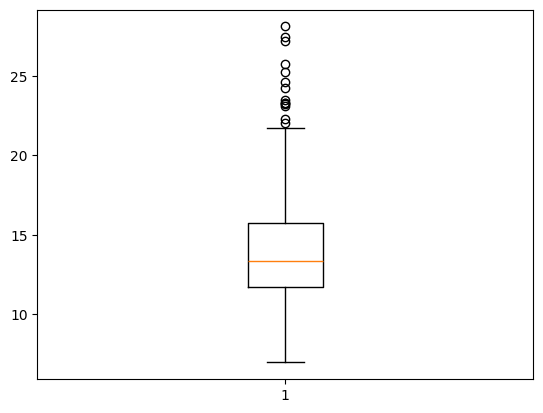

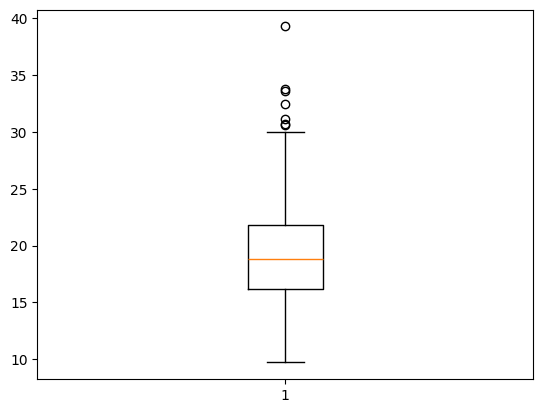

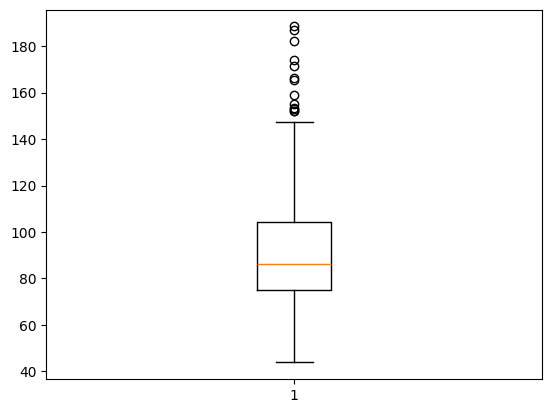

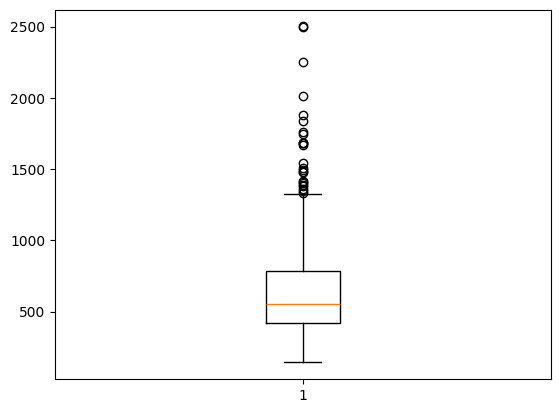

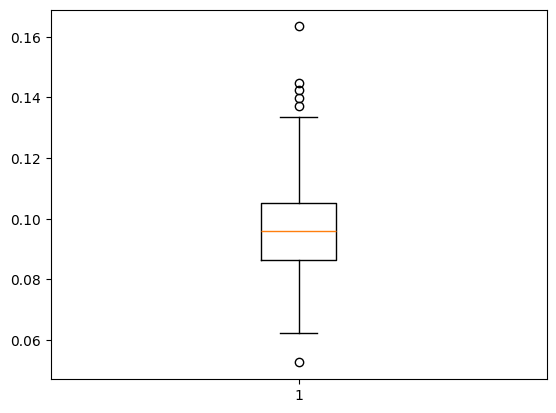

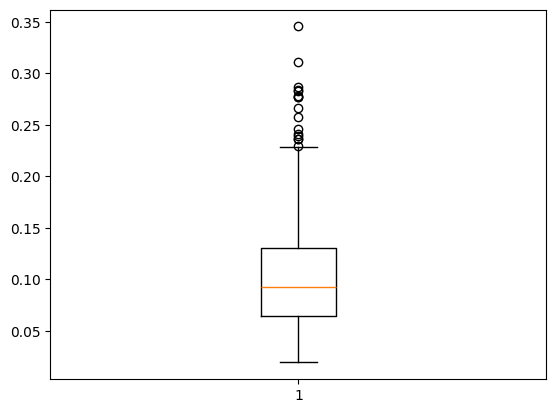

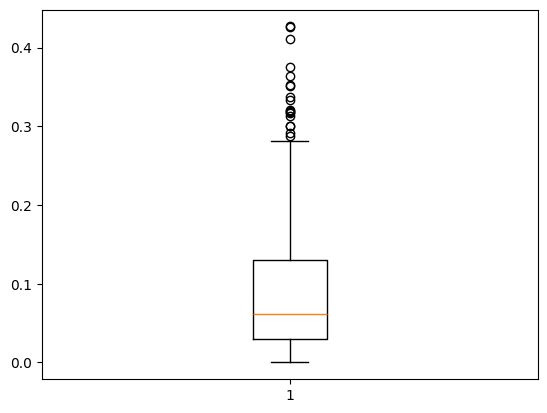

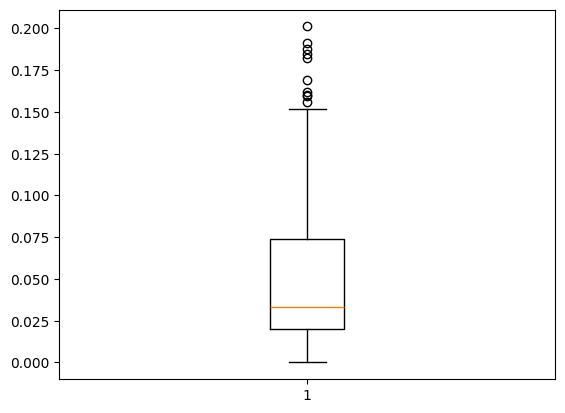

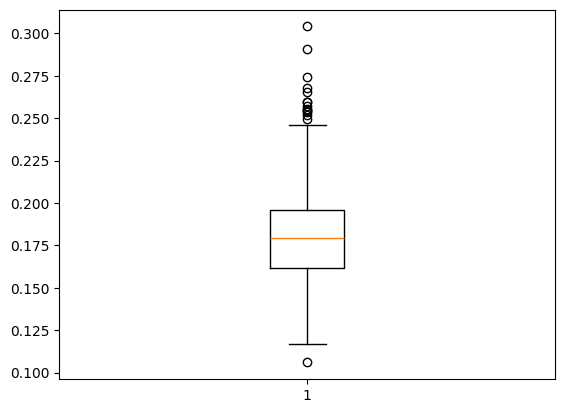

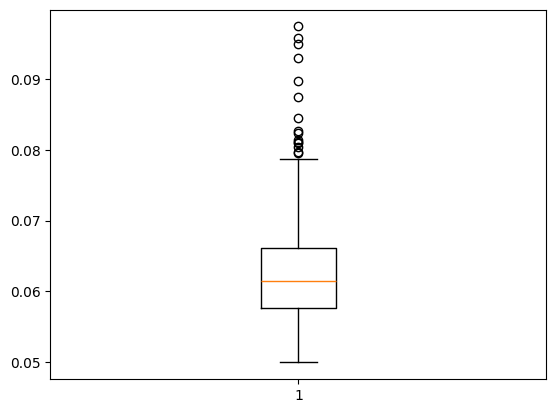

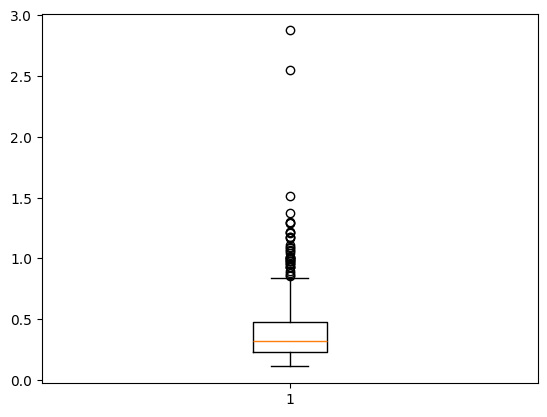

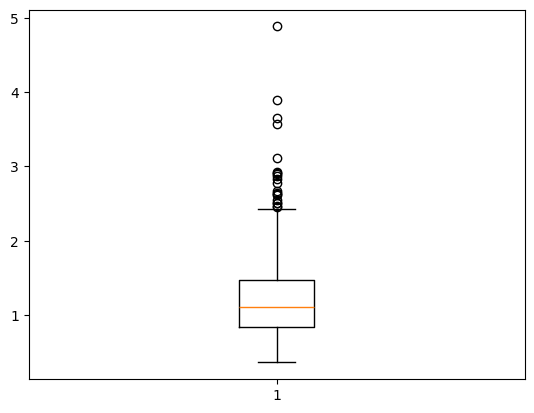

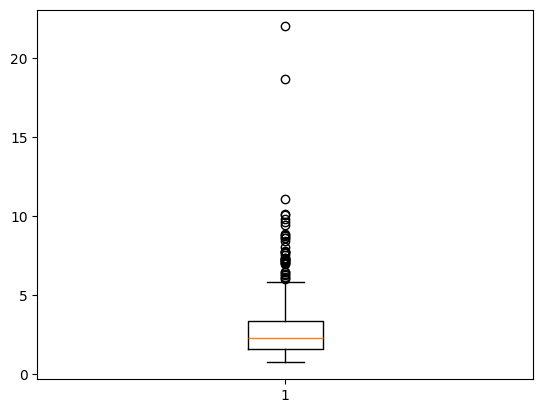

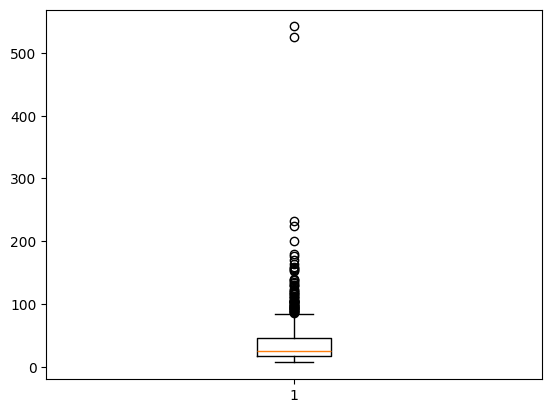

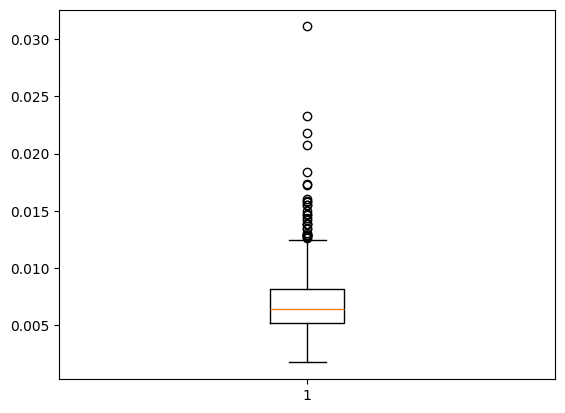

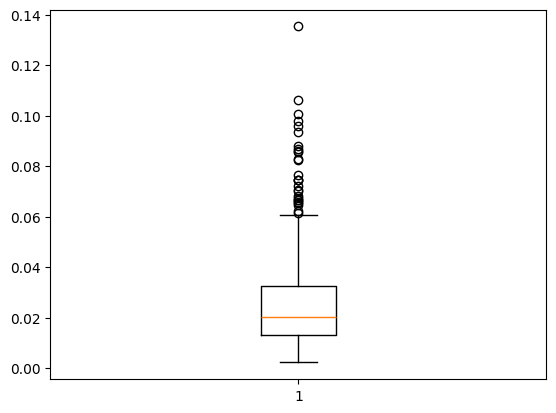

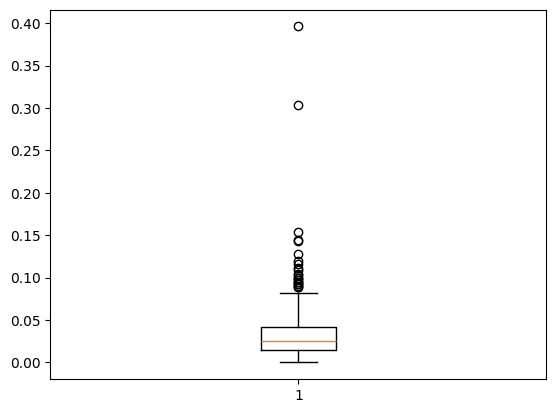

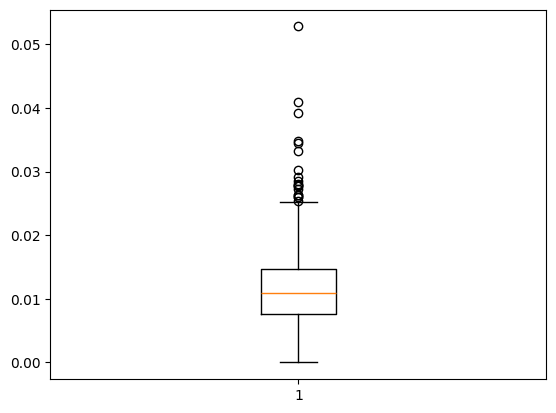

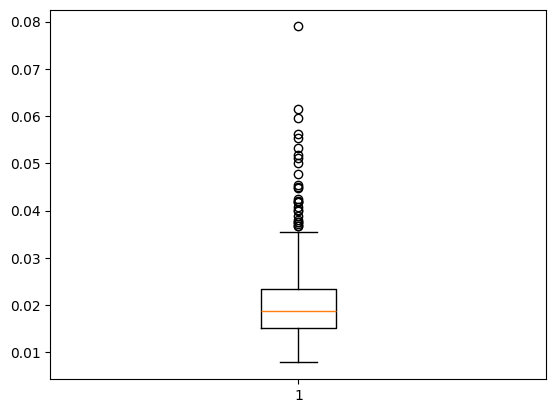

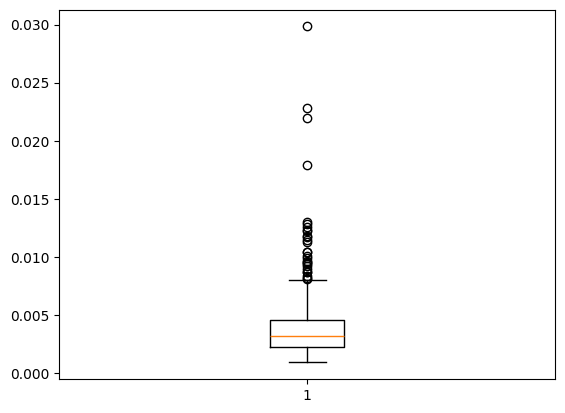

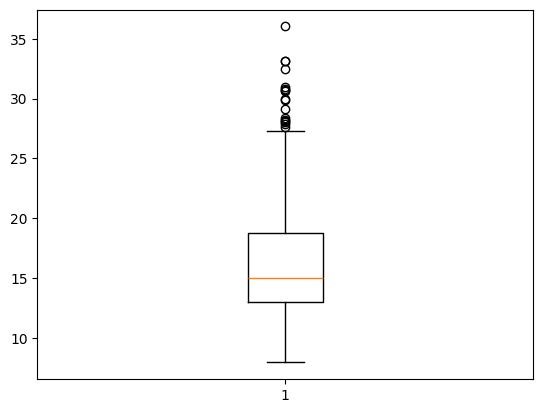

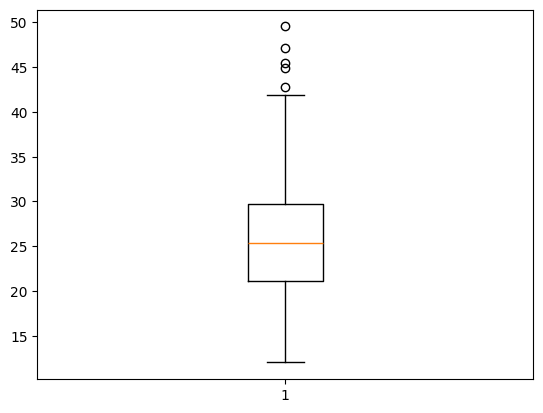

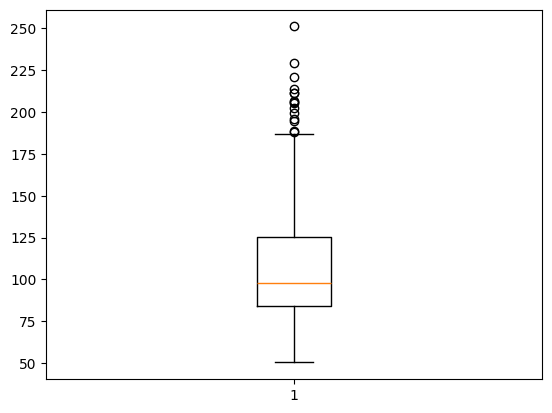

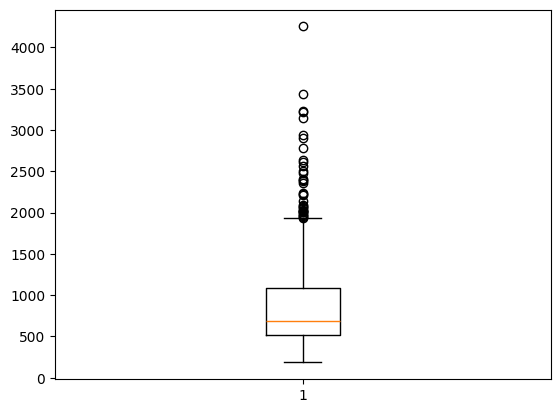

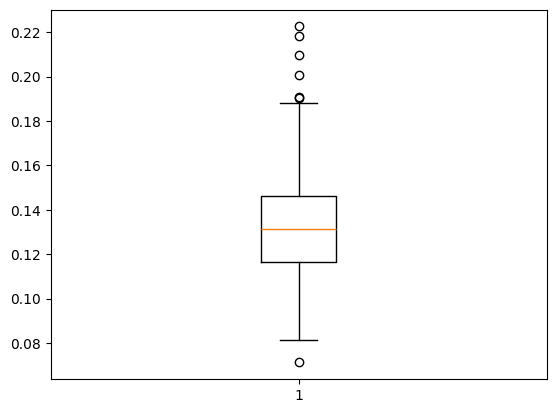

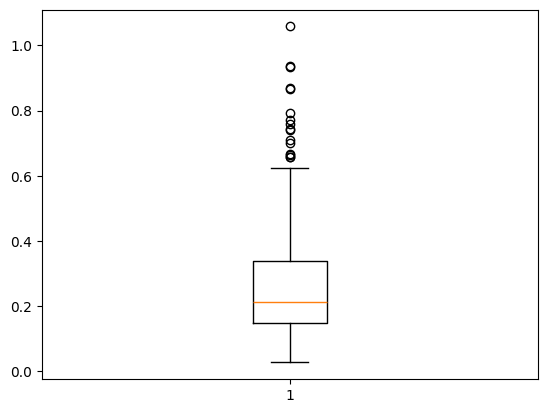

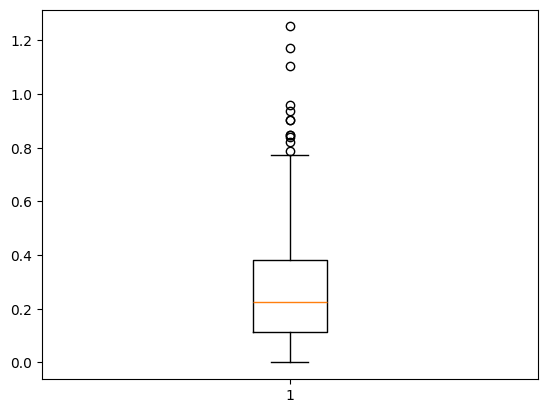

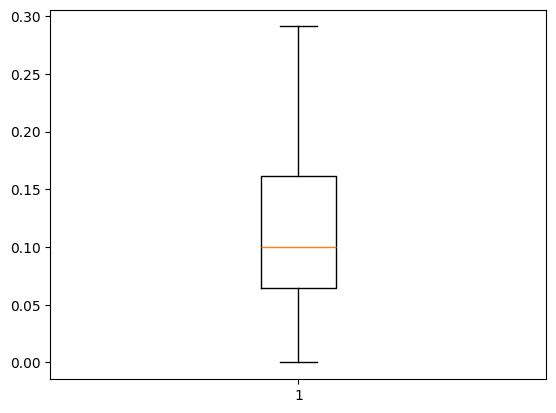

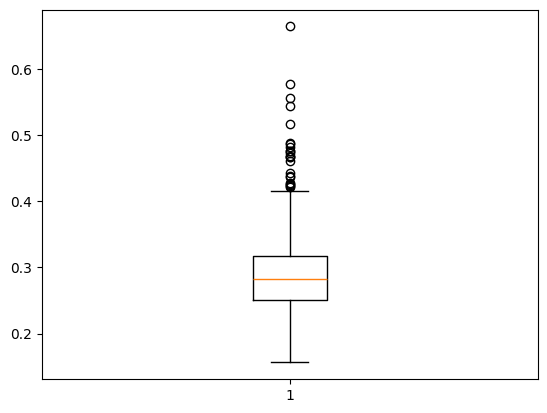

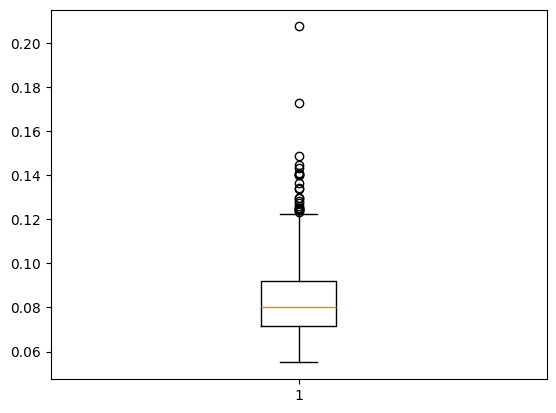

In [7]:
for label in list(df.columns.values):
  plt.boxplot(df.loc[:, label])
  plt.show()

As we can see from the boxplots, there are actually many outliers.

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

# Training and Testing Data Sets

We will be splitting the datasets in an 80-20 split, with 80% of the data going into training the model while 20% going into testing the model.

Here, we define a function called *scaled dataset*, taking in the inputs *dataframe* and *oversample.* This function scales the "inputs" in order for the variables to affect the output appropriately. If the dataset oversamples one diagnoses from the other, it is recommended that the oversample parameter to be turned True as imbalances in the training dataset might cause the model to have some issues in determining a diagnosis.


In [12]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

In [13]:
train, test = train_test_split(df, test_size = 0.2, random_state = 1, shuffle = True)
train, x_train, y_train = scale_dataset(train, oversample = True)
test, x_test, y_test = scale_dataset(test, oversample = False)

We check the length of train and test in order to ensure that the split is done correctly.

In [14]:
print(len(train))
print(len(test))

570
114


# k-Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Here, we wanted to know which k-Nearest Neighbors model will be the most accurate in determining whether or not a tumor is benign or malignant. Because of this, we will be iterating through 2 to 10 to determine which will be the most accurate.

In [19]:
accuracy_scores = []

for i in range(2, 11):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(x_train, y_train)
  y_pred = knn_model.predict(x_test)
  print(f'Results for {i}-mer nearest neighbors:')
  print(classification_report(y_test, y_pred))
  accuracy_scores.append(accuracy_score(y_test, y_pred))

Results for 2-mer nearest neighbors:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Results for 3-mer nearest neighbors:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Results for 4-mer nearest neighbors:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg     

We will now be plotting the accuracy values to select which is the best k-mer value for our model.

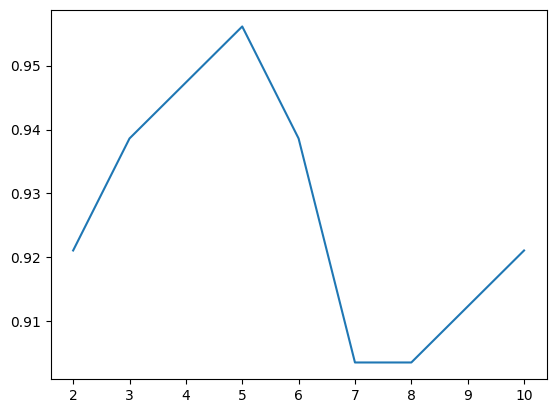

0.956140350877193

In [20]:
x_axis = [x + 2 for x in range(len(accuracy_scores))]
plt.plot(x_axis, accuracy_scores)
plt.show()

max_k = accuracy_scores.index(max(accuracy_scores)) + 2
kmer_accuracy_max = max(accuracy_scores)
kmer_accuracy_max

As it can be seen in the graph, the maximum accuracy score is at k = 7.

# Naive Bayes

Naive Bayes has discrete values as their inputs and can input a probability score for each diagnosis type. The output that it releases is the diagnosis that has the highest probability.

In [9]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))
nb_accuracy_max = accuracy_score(y_test, y_pred)
nb_accuracy_max

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



0.9473684210526315

Comparing the accuracy values of Naive Bayes (0.956140350877193) vs. 9-nearest neighbors (0.9824561403508771), the Naive Bayes is less accurate.

# Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import inspect

In [ ]:
max_log_reg_acc = 0
max_log_reg_mod = None
max_log_reg_param = []

for penalty in ['l2', None]:
  for fit_intercept in [True, False]:
    for multi_class in ['auto', 'ovr', 'multinomial']:
      for warm_start in [True, False]:
        lg_model = LogisticRegression(penalty = penalty, fit_intercept = fit_intercept, multi_class = multi_class, warm_start = warm_start)
        lg_model = lg_model.fit(x_train, y_train)
        y_pred = lg_model.predict(x_test)
        print(f'This is the result for the penalty = {penalty}, fit_intercept = {fit_intercept}, multi_class = {multi_class}, and warm_start = {warm_start}')
        print(classification_report(y_test, y_pred))

        accuracy_temp = accuracy_score(y_test, y_pred)

        if accuracy_temp > max_log_reg_acc:
          max_log_reg_acc = accuracy_temp
          max_log_reg_mod = lg_model
          max_log_reg_param = [penalty, fit_intercept, multi_class, warm_start]

print(max_log_reg_acc)
print(max_log_reg_param)

This is the result for the penalty = l2, fit_intercept = True, multi_class = auto, and warm_start = True
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

This is the result for the penalty = l2, fit_intercept = True, multi_class = auto, and warm_start = False
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

This is the result for the penalty = l2, fit_intercept = True, multi_class = ovr, and warm_start = True
              precision    reca

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

This is the result for the penalty = None, fit_intercept = True, multi_class = auto, and warm_start = True
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

This is the result for the penalty = None, fit_intercept = True, multi_class = auto, and warm_start = False
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

This is the result for the penalty = None, fit_intercept = True, multi_class = ovr, and warm_start = True
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

This is the result for the penalty = None, fit_intercept = True, multi_class = ovr, and warm_start = False
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

This is the result for the penalty = None, fit_intercept = True, multi_class = multinomial, and warm_start = True
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.89      0.98      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

This is the result for the penalty = None, fit_intercept = True, multi_class = multinomial, and warm_start = False
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.89      0.98      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

This is the result for the penalty = None, fit_intercept = False, multi_class = auto, and warm_start = True
         

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

This is the result for the penalty = None, fit_intercept = False, multi_class = auto, and warm_start = False
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        72
           1       0.91      1.00      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

This is the result for the penalty = None, fit_intercept = False, multi_class = ovr, and warm_start = True
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        72
           1       0.91      1.00      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

This is the result for the penalty = None, fit_intercept = False, multi_class = ovr, and warm_start = False
              precisio

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

As we can see here, the most accurate model out of the parameters tested is the function where the following conditions are held:


*   penalty = l2
*   fit_intercept = True
*   multi_class = auto
*   warm_start = True

This specific logistic regression model has an accuracy value of 0.9912280701754386, which is higher than the accuracy value of 9 nearest neighbors at 0.9824561403508771.


# Support Vector Machines

In [ ]:
from sklearn.svm import SVC

We will again test which parameters will make the most accurate SVM model.

In [ ]:
max_svc_acc = 0
max_svc_param = []
max_svc_mod = None

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  for degree in [1, 2, 3, 4, 5]:
    for gamma in ['scale', 'auto']:
      for shrinking in [True, False]:
        for probability in [True, False]:
          for break_ties in [True, False]:
            svm_model = SVC(kernel = kernel, degree = degree, gamma = gamma, shrinking = shrinking, probability = probability, break_ties = break_ties)
            svm_model = svm_model.fit(x_train, y_train)
            y_pred = svm_model.predict(x_test)
            print(f'kernel = {kernel}, degree = {degree}, gamma = {gamma}, shrinking = {shrinking}, probability = {probability}, break_ties = {break_ties}')
            print(classification_report(y_test, y_pred))

            accuracy_temp = accuracy_score(y_test, y_pred)
            if accuracy_temp > max_svc_acc:
              max_svc_acc = accuracy_temp
              max_svc_mod = svm_model
              max_svc_param = [kernel, degree, gamma, shrinking, probability, break_ties]

print(max_svc_acc)
print(max_svc_param)

kernel = linear, degree = 1, gamma = scale, shrinking = True, probability = True, break_ties = True
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

kernel = linear, degree = 1, gamma = scale, shrinking = True, probability = True, break_ties = False
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

kernel = linear, degree = 1, gamma = scale, shrinking = True, probability = False, break_ties = True
              precision    recall  f1-score 

The most accurate support vector machine model has the parameters:


*   kernel = poly
*   degree = 1
*   gamma = scale
*   shrinking = True
*   probability = True
*   breaking_ties = True

However, the accuracy score of this SVM model (0.9824561403508771) is lower than the accuracy score of logistic regression (0.9912280701754386).



# Cross Validation

Cross validation is done on the selected model in order to verify the model's ability to predict new data.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(max_log_reg_mod,
                         x_train,
                         y_train,
                         scoring = 'accuracy',
                         cv = 10)

In [ ]:
scores

array([0.96491228, 0.96491228, 0.96491228, 0.98245614, 0.96491228,
       0.98245614, 0.98245614, 1.        , 1.        , 0.98245614])

In [ ]:
scores.mean()

0.9789473684210526

Since the accuracy score is still relatively high, we can say that the model can accurately predict breast cancer from the features 97.89% of the time.

# Feature Importance

Feature importance is looked into in order to determine which of the features has the most influence on the model's decision.

In [ ]:
from sklearn.inspection import permutation_importance

The function below is taken from https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html#feature-importance-by-permutation.

In [ ]:
def plot_feature_importances(perm_importance_result, feat_name):
    """bar plot the feature importance"""

    fig, ax = plt.subplots()

    indices = perm_importance_result["importances_mean"].argsort()
    plt.barh(
        range(len(indices)),
        perm_importance_result["importances_mean"][indices],
        xerr=perm_importance_result["importances_std"][indices],
    )

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

In [ ]:
perm_importance_result_train = permutation_importance(max_log_reg_mod, x_train, y_train, n_repeats = 10)

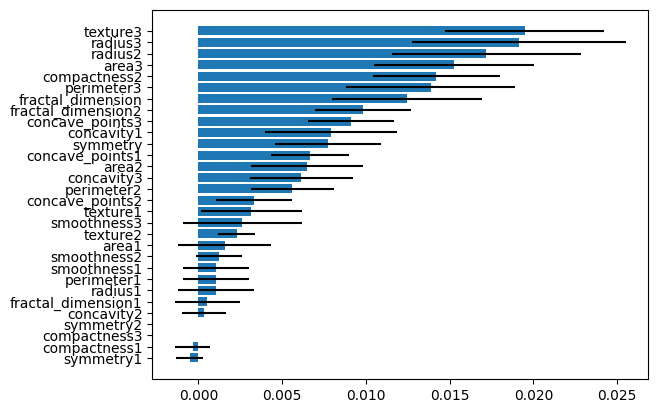

In [ ]:
plot_feature_importances(perm_importance_result_train, df.columns[1:])

As it can be seen in the plot above, the most important features are: the worst texture, the worst radius, and the standard error of the radius. These could be further looked into for diagnostics of breast cancer.

# Pickle

In order for us to deploy the model, we will be using pickle.

In [ ]:
import pickle

In [ ]:
pickle.dump(max_log_reg_mod, open('logistic_model.pkl', 'wb'))

In [ ]:
test_model = pickle.load(open('logistic_model.pkl', 'rb'))
print(test_model.predict([range(30)]))

[1]


# Web Development

In [ ]:
!pip install colabcode
!pip install fastapi